## 导入库

In [60]:
from __future__ import  absolute_import,division,print_function

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np 
print(tf.__version__)

1.10.0


## 波士顿住房价格数据集

In [61]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 将训练集打乱
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

## 探索数据
这个数据集比我们迄今为止使用的其他数据集小得多：它共有506个示例，分为404个训练样例和102个测试示例：

In [62]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


该数据集包含13个不同的指标：

- 人均犯罪率。
- 占地面积超过25,000平方英尺的住宅用地比例。
- 每个城镇非零售业务的比例。
- Charles River虚拟变量（如果管道限制河流则= 1;否则为0）。
- 一氧化氮浓度（每千万份）。
- 每栋住宅的平均房间数。
- 1940年以前建造的自住单位比例。
- 到波士顿五个就业中心的加权距离。
- 径向高速公路的可达性指数。
- 每10,000美元的全额物业税率。
- 城镇的学生与教师比例。
- 1000 *（Bk - 0.63）** 2其中Bk是城镇黑人的比例。
- 人口比例较低的百分比。

这些输入数据特征中的每一个都使用不同的比例存储。某些功能由0到1之间的比例表示，其他功能的范围介于1到12之间，有些功能介于0到100之间，依此类推。这通常是现实世界数据的情况，了解如何探索和清理此类数据是一项重要的开发技能。

In [63]:
print(train_data[0])  # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


使用pandas库在格式良好的表中显示数据集的前几行：

In [64]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


### 标签

In [65]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


## 特征数据标准化
将数据按比例缩放，使之落入一个小的特定区间。在某些比较和评价的指标处理中经常会用到，
去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权。
<img src="pic23.png" style="width:500px;height:100px;">
标准化有两个好处:
- 提升模型的收敛速度
- 提升模型的精度

In [66]:
#当输入数据要素具有不同范围的值时，应单独缩放每个要素。
# 在计算平均值和标准时，不使用测试数据
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


## 建立模型

In [74]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu,
                           input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)
    # 均方误差（MSE）是用于回归问题的常见损失函数（不同于分类问题）。
    # 常见的回归指标是平均绝对误差（MAE）。
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model

model = build_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## 训练模型

In [83]:
# 通过为每个完成的epoch打印一个点来显示培训进度
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500

# 储存训练信息
#    verbose: Integer. 0, 1, or 2. Verbosity mode.
#    0 = silent, 1 = progress bar, 2 = one line per epoch.
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=1,
                    callbacks=[PrintDot()])

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 115us/step - loss: 0.5666 - mean_absolute_error: 0.5630 - val_loss: 13.1213 - val_mean_absolute_error: 2.3690

.Epoch 2/500
323/323 [==============================] - 0s 84us/step - loss: 0.4519 - mean_absolute_error: 0.4709 - val_loss: 13.3426 - val_mean_absolute_error: 2.4564
.Epoch 3/500
323/323 [==============================] - 0s 68us/step - loss: 0.6064 - mean_absolute_error: 0.5186 - val_loss: 13.3056 - val_mean_absolute_error: 2.4578
.Epoch 4/500
323/323 [==============================] - 0s 56us/step - loss: 0.5649 - mean_absolute_error: 0.5483 - val_loss: 12.7202 - val_mean_absolute_error: 2.3322
.Epoch 5/500
323/323 [==============================] - 0s 65us/step - loss: 0.5227 - mean_absolute_error: 0.5090 - val_loss: 13.8188 - val_mean_absolute_error: 2.3537
.Epoch 6/500
323/323 [==============================] - 0s 80us/step - loss: 0.4878 - mean_absolute_error: 0.5045 

.Epoch 49/500
323/323 [==============================] - 0s 53us/step - loss: 0.4511 - mean_absolute_error: 0.4898 - val_loss: 13.3326 - val_mean_absolute_error: 2.4508
.Epoch 50/500
323/323 [==============================] - 0s 56us/step - loss: 0.4755 - mean_absolute_error: 0.4794 - val_loss: 13.1491 - val_mean_absolute_error: 2.4142
.Epoch 51/500
323/323 [==============================] - 0s 53us/step - loss: 0.4275 - mean_absolute_error: 0.4486 - val_loss: 15.0941 - val_mean_absolute_error: 2.7569
.Epoch 52/500
323/323 [==============================] - 0s 50us/step - loss: 0.6376 - mean_absolute_error: 0.5499 - val_loss: 13.0235 - val_mean_absolute_error: 2.3240
.Epoch 53/500
323/323 [==============================] - 0s 62us/step - loss: 0.4721 - mean_absolute_error: 0.4982 - val_loss: 15.6254 - val_mean_absolute_error: 2.7515
.Epoch 54/500
323/323 [==============================] - 0s 56us/step - loss: 0.6229 - mean_absolute_error: 0.5347 - val_loss: 13.1709 - val_mean_absolute_

323/323 [==============================] - 0s 59us/step - loss: 0.4331 - mean_absolute_error: 0.4802 - val_loss: 14.6636 - val_mean_absolute_error: 2.6367
.Epoch 98/500
323/323 [==============================] - 0s 62us/step - loss: 0.5436 - mean_absolute_error: 0.5407 - val_loss: 13.1498 - val_mean_absolute_error: 2.3518
.Epoch 99/500
323/323 [==============================] - 0s 71us/step - loss: 0.5283 - mean_absolute_error: 0.5103 - val_loss: 13.2112 - val_mean_absolute_error: 2.3940
.Epoch 100/500
323/323 [==============================] - 0s 65us/step - loss: 0.5011 - mean_absolute_error: 0.4927 - val_loss: 13.3814 - val_mean_absolute_error: 2.4544
.Epoch 101/500
323/323 [==============================] - 0s 65us/step - loss: 0.4835 - mean_absolute_error: 0.4676 - val_loss: 14.2559 - val_mean_absolute_error: 2.5123

.Epoch 102/500
323/323 [==============================] - 0s 65us/step - loss: 0.4785 - mean_absolute_error: 0.4438 - val_loss: 14.6625 - val_mean_absolute_error: 2.6

323/323 [==============================] - 0s 71us/step - loss: 0.5386 - mean_absolute_error: 0.4987 - val_loss: 14.1893 - val_mean_absolute_error: 2.5193
.Epoch 146/500
323/323 [==============================] - 0s 62us/step - loss: 0.3641 - mean_absolute_error: 0.4304 - val_loss: 13.3686 - val_mean_absolute_error: 2.4221
.Epoch 147/500
323/323 [==============================] - 0s 62us/step - loss: 0.4074 - mean_absolute_error: 0.4565 - val_loss: 13.4654 - val_mean_absolute_error: 2.3664
.Epoch 148/500
323/323 [==============================] - 0s 65us/step - loss: 0.4466 - mean_absolute_error: 0.4815 - val_loss: 13.7485 - val_mean_absolute_error: 2.3986
.Epoch 149/500
323/323 [==============================] - 0s 59us/step - loss: 0.4953 - mean_absolute_error: 0.4746 - val_loss: 13.0376 - val_mean_absolute_error: 2.3572
.Epoch 150/500
323/323 [==============================] - 0s 56us/step - loss: 0.5900 - mean_absolute_error: 0.5440 - val_loss: 13.9609 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 53us/step - loss: 0.4070 - mean_absolute_error: 0.4300 - val_loss: 13.2698 - val_mean_absolute_error: 2.4335
.Epoch 194/500
323/323 [==============================] - 0s 59us/step - loss: 0.4205 - mean_absolute_error: 0.4345 - val_loss: 13.2893 - val_mean_absolute_error: 2.4006
.Epoch 195/500
323/323 [==============================] - 0s 62us/step - loss: 0.5732 - mean_absolute_error: 0.5441 - val_loss: 13.6250 - val_mean_absolute_error: 2.4390
.Epoch 196/500
323/323 [==============================] - 0s 71us/step - loss: 0.3387 - mean_absolute_error: 0.3852 - val_loss: 13.9920 - val_mean_absolute_error: 2.4278
.Epoch 197/500
323/323 [==============================] - 0s 74us/step - loss: 0.4494 - mean_absolute_error: 0.4745 - val_loss: 13.3573 - val_mean_absolute_error: 2.3784
.Epoch 198/500
323/323 [==============================] - 0s 68us/step - loss: 0.4491 - mean_absolute_error: 0.4530 - val_loss: 13.3668 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 74us/step - loss: 0.5056 - mean_absolute_error: 0.4886 - val_loss: 14.4594 - val_mean_absolute_error: 2.4369
.Epoch 242/500
323/323 [==============================] - 0s 59us/step - loss: 0.3980 - mean_absolute_error: 0.4607 - val_loss: 13.6120 - val_mean_absolute_error: 2.5084
.Epoch 243/500
323/323 [==============================] - 0s 59us/step - loss: 0.3394 - mean_absolute_error: 0.3989 - val_loss: 14.1347 - val_mean_absolute_error: 2.3861
.Epoch 244/500
323/323 [==============================] - 0s 77us/step - loss: 0.4688 - mean_absolute_error: 0.4939 - val_loss: 13.4094 - val_mean_absolute_error: 2.3337
.Epoch 245/500
323/323 [==============================] - 0s 62us/step - loss: 0.4075 - mean_absolute_error: 0.4550 - val_loss: 13.6584 - val_mean_absolute_error: 2.3625
.Epoch 246/500
323/323 [==============================] - 0s 59us/step - loss: 0.3814 - mean_absolute_error: 0.4280 - val_loss: 14.6890 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 59us/step - loss: 0.4759 - mean_absolute_error: 0.4519 - val_loss: 15.5500 - val_mean_absolute_error: 2.5762
.Epoch 290/500
323/323 [==============================] - 0s 71us/step - loss: 0.4298 - mean_absolute_error: 0.3993 - val_loss: 14.7240 - val_mean_absolute_error: 2.5294
.Epoch 291/500
323/323 [==============================] - 0s 62us/step - loss: 0.5111 - mean_absolute_error: 0.4598 - val_loss: 13.5604 - val_mean_absolute_error: 2.4605
.Epoch 292/500
323/323 [==============================] - 0s 87us/step - loss: 0.3086 - mean_absolute_error: 0.3707 - val_loss: 14.3567 - val_mean_absolute_error: 2.5316
.Epoch 293/500
323/323 [==============================] - 0s 56us/step - loss: 0.4848 - mean_absolute_error: 0.5066 - val_loss: 14.1224 - val_mean_absolute_error: 2.5528
.Epoch 294/500
323/323 [==============================] - 0s 62us/step - loss: 0.3510 - mean_absolute_error: 0.4291 - val_loss: 14.8807 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 59us/step - loss: 0.3987 - mean_absolute_error: 0.4621 - val_loss: 14.2308 - val_mean_absolute_error: 2.4671
.Epoch 338/500
323/323 [==============================] - 0s 59us/step - loss: 0.4249 - mean_absolute_error: 0.4770 - val_loss: 15.0206 - val_mean_absolute_error: 2.5076
.Epoch 339/500
323/323 [==============================] - 0s 56us/step - loss: 0.4374 - mean_absolute_error: 0.4386 - val_loss: 14.3938 - val_mean_absolute_error: 2.5649
.Epoch 340/500
323/323 [==============================] - 0s 74us/step - loss: 0.2613 - mean_absolute_error: 0.3426 - val_loss: 15.3797 - val_mean_absolute_error: 2.5727
.Epoch 341/500
323/323 [==============================] - 0s 56us/step - loss: 0.5318 - mean_absolute_error: 0.4902 - val_loss: 13.8977 - val_mean_absolute_error: 2.4907
.Epoch 342/500
323/323 [==============================] - 0s 59us/step - loss: 0.4420 - mean_absolute_error: 0.4832 - val_loss: 13.5157 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 56us/step - loss: 0.3156 - mean_absolute_error: 0.3865 - val_loss: 14.4422 - val_mean_absolute_error: 2.5024
.Epoch 386/500
323/323 [==============================] - 0s 53us/step - loss: 0.3828 - mean_absolute_error: 0.4298 - val_loss: 15.5556 - val_mean_absolute_error: 2.6503
.Epoch 387/500
323/323 [==============================] - 0s 53us/step - loss: 0.4557 - mean_absolute_error: 0.4855 - val_loss: 14.9161 - val_mean_absolute_error: 2.6406
.Epoch 388/500
323/323 [==============================] - 0s 68us/step - loss: 0.3918 - mean_absolute_error: 0.4208 - val_loss: 14.0556 - val_mean_absolute_error: 2.6137
.Epoch 389/500
323/323 [==============================] - 0s 59us/step - loss: 0.3422 - mean_absolute_error: 0.3895 - val_loss: 13.6612 - val_mean_absolute_error: 2.3938
.Epoch 390/500
323/323 [==============================] - 0s 56us/step - loss: 0.3128 - mean_absolute_error: 0.3994 - val_loss: 14.2913 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 65us/step - loss: 0.3015 - mean_absolute_error: 0.3970 - val_loss: 14.8728 - val_mean_absolute_error: 2.5382
.Epoch 434/500
323/323 [==============================] - 0s 56us/step - loss: 0.4275 - mean_absolute_error: 0.4745 - val_loss: 14.3904 - val_mean_absolute_error: 2.4626
.Epoch 435/500
323/323 [==============================] - 0s 53us/step - loss: 0.3118 - mean_absolute_error: 0.3934 - val_loss: 14.6126 - val_mean_absolute_error: 2.4688
.Epoch 436/500
323/323 [==============================] - 0s 56us/step - loss: 0.4395 - mean_absolute_error: 0.4587 - val_loss: 14.5141 - val_mean_absolute_error: 2.5097
.Epoch 437/500
323/323 [==============================] - 0s 50us/step - loss: 0.4071 - mean_absolute_error: 0.4492 - val_loss: 15.0469 - val_mean_absolute_error: 2.5240
.Epoch 438/500
323/323 [==============================] - 0s 53us/step - loss: 0.2745 - mean_absolute_error: 0.3722 - val_loss: 14.0973 - val_mean_absolute_error: 2.

323/323 [==============================] - 0s 56us/step - loss: 0.3701 - mean_absolute_error: 0.4591 - val_loss: 14.6876 - val_mean_absolute_error: 2.5399
.Epoch 482/500
323/323 [==============================] - 0s 65us/step - loss: 0.2846 - mean_absolute_error: 0.3824 - val_loss: 14.8081 - val_mean_absolute_error: 2.4910
.Epoch 483/500
323/323 [==============================] - 0s 59us/step - loss: 0.3232 - mean_absolute_error: 0.4142 - val_loss: 13.7015 - val_mean_absolute_error: 2.4309
.Epoch 484/500
323/323 [==============================] - 0s 62us/step - loss: 0.3605 - mean_absolute_error: 0.4398 - val_loss: 14.5412 - val_mean_absolute_error: 2.4869
.Epoch 485/500
323/323 [==============================] - 0s 87us/step - loss: 0.3715 - mean_absolute_error: 0.4357 - val_loss: 14.5124 - val_mean_absolute_error: 2.4597
.Epoch 486/500
323/323 [==============================] - 0s 93us/step - loss: 0.4118 - mean_absolute_error: 0.4933 - val_loss: 14.2206 - val_mean_absolute_error: 2.

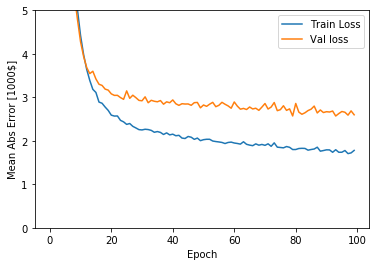

In [89]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)


....................................................................................................
...........................................................

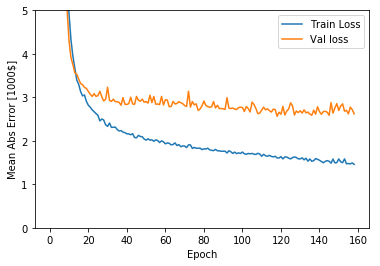

In [90]:
model = build_model()

# Stop training when a monitored quantity has stopped improving.
# early_stop是防止过度拟合的有用技术。
early_stop = keras.callbacks.EarlyStopping(patience=20)

history = model.fit(train_data,train_labels,epochs=EPOCHS,
                    validation_split=0.2,verbose=0,
                    callbacks=[early_stop,PrintDot()])

plot_history(history)


In [91]:
[loss,mae] = model.evaluate(test_data,test_labels,verbose=0)

print('Testing set Mean Abs Error: ${:7.2f}'.format(mae * 1000))

Testing set Mean Abs Error: $2798.71


[ 9.648848  20.21638   22.116224  33.683434  26.260954  21.456581
 25.90334   23.165125  20.563232  23.730618  22.87804   16.873997
 16.0719    42.349857  20.251781  20.346092  27.245502  18.092634
 20.19209   28.8628    12.206282  13.657769  20.937214  17.506414
 19.770605  26.936504  28.869143  30.076694  12.191008  20.828997
 20.633358  16.972652  34.463634  25.488762  19.522245   7.8514247
 15.762919  18.403555  20.97887   26.759155  32.065628  28.988752
 13.679272  41.945255  30.729586  26.96198   26.97907   18.608593
 23.699255  23.566349  36.88994   20.520952  11.255326  15.195088
 35.272396  29.302105  12.533597  48.223774  35.567135  25.818516
 26.548199  16.52083   16.303389  19.307652  23.732204  20.649729
 13.718414  22.359612  13.196823   8.286376  29.317528  28.54176
 26.901691  12.930912  24.614857  19.407965  20.158049  24.68524
 35.876553  10.85      22.361462  37.396442  16.855728  13.189377
 18.276466  21.228235  21.208242  20.69406   20.702394  35.090313
 24.097412 

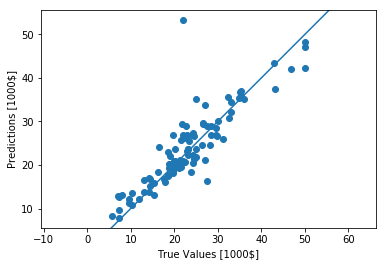

In [109]:
test_predictions = model.predict(test_data).flatten()
print(test_predictions)
print(test_labels)
#绘制散点
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
#保持纵横坐标的刻度一致
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
#绘制回归线
_ = plt.plot([-100,100],[-100,100])


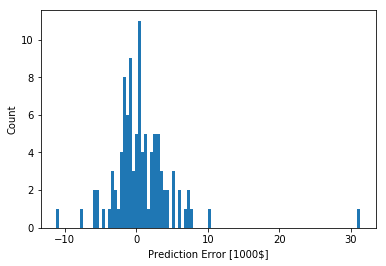

In [98]:
error = test_predictions - test_labels
plt.hist(error,bins=100)
plt.xlabel('Prediction Error [1000$]')
_ = plt.ylabel('Count')

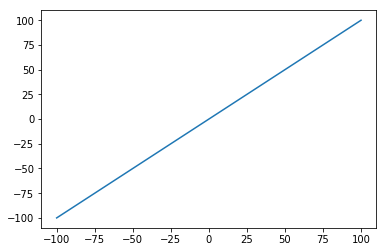

In [108]:
plt.plot([-100,100],[-100,100])